# 机器学习工程师纳米学位
## 模型评价与验证
## 项目 1: 预测波士顿房价


欢迎来到机器学习工程师纳米学位的第一个项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**编程练习**开始的标题表示接下来的内容中有需要你必须实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**TODO**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。你的项目将会根据你对问题的回答和撰写代码所实现的功能来进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---
## 第一步. 导入数据
在这个项目中，你将利用马萨诸塞州波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对房屋做特定预测---尤其是对房屋的价值。对于房地产经纪等人的日常工作来说，这样的预测模型被证明非常有价值。

此项目的数据集来自[UCI机器学习知识库(数据集已下线)](https://archive.ics.uci.edu/ml/datasets.html)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。本项目对原始数据集做了以下处理：
- 有16个`'MEDV'` 值为50.0的数据点被移除。 这很可能是由于这些数据点包含**遗失**或**看不到的值**。
- 有1个数据点的 `'RM'` 值为8.78. 这是一个异常值，已经被移除。
- 对于本项目，房屋的`'RM'`， `'LSTAT'`，`'PTRATIO'`以及`'MEDV'`特征是必要的，其余不相关特征已经被移除。
- `'MEDV'`特征的值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应。

运行下面区域的代码以载入波士顿房屋数据集，以及一些此项目所需的Python库。如果成功返回数据集的大小，表示数据集已载入成功。

In [4]:
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code

# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')
    
# 让结果在notebook中显示
%matplotlib inline

In [5]:
# 载入波士顿房屋的数据集
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

# 完成
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


---
## 第二步. 分析数据
在项目的第一个部分，你会对波士顿房地产数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测房屋价值的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。
- **特征** `'RM'`， `'LSTAT'`，和 `'PTRATIO'`，给我们提供了每个数据点的数量相关的信息。
- **目标变量**：` 'MEDV'`，是我们希望预测的变量。

他们分别被存在`features`和`prices`两个变量名中。

### 编程练习 1：基础统计运算
你的第一个编程练习是计算有关波士顿房价的描述统计数据。我们已为你导入了` numpy `，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。
在下面的代码中，你要做的是：
- 计算`prices`中的`'MEDV'`的最小值、最大值、均值、中值和标准差；
- 将运算结果储存在相应的变量中。

In [3]:
#TODO 1

#目标：计算价值的最小值
minimum_price = prices.min()

#目标：计算价值的最大值
maximum_price = prices.max()

#目标：计算价值的平均值
mean_price = prices.mean()

#目标：计算价值的中值
median_price = prices.median()

#目标：计算价值的标准差
std_price = prices.std()

#目标：输出计算的结果
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


### 问题 1 - 特征观察

如前文所述，本项目中我们关注的是其中三个值:`'RM'`、`'LSTAT'` 和`'PTRATIO'`，对每一个数据点:
- `'RM'` 是该地区中每个房屋的平均房间数量；
- `'LSTAT'` 是指该地区有多少百分比的房东属于是低收入阶层（有工作但收入微薄）；
- `'PTRATIO'` 是该地区的中学和小学里，学生和老师的数目比（`学生/老师`）。

_凭直觉，上述三个特征中对每一个来说，你认为增大该特征的数值，`'MEDV'`的值会是**增大**还是**减小**呢？每一个答案都需要你给出理由。_

**提示：**你预期一个`'RM'` 值是6的房屋跟`'RM'` 值是7的房屋相比，价值更高还是更低呢？

### 问题 1 - 回答：

1、RM增大，代表房子面积增大，所以MEDV价格也会增大。
2、LSTAT增大，代表该地区的低收入阶层的房东的人数增加，低收入阶层的房东所以拥有的房子面积一般不大，也就是说随着LSTAT增大，MEDV减少。
3、PTRATIO增大，代表每位老师教授的班级学生数量增多，说明该地区人口数量多，人口数量多导致房屋需求量增大，房屋供不应求，MEDV增加。

### 编程练习 2: 数据分割与重排
接下来，你需要把波士顿房屋数据集分成训练和测试两个子集。通常在这个过程中，数据也会被重排列，以消除数据集中由于顺序而产生的偏差。
在下面的代码中，你需要

使用 `sklearn.model_selection` 中的 `train_test_split`， 将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；

In [4]:
# TODO 2

# 提示： 导入train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

### 问题 2 - 训练及测试
*将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有什么好处？*

*如果用模型已经见过的数据，例如部分训练集数据进行测试，又有什么坏处？*

**提示：** 如果没有数据来对模型进行测试，会出现什么问题？

### 问题 2 - 回答:

答：使用真实数据来检验由测试数据建立的模型的准确率，如果没有测试数据，就没有真实数据进行检验。
   如果使用模型已经见过的数据，那么只是进行拟合，无法准确得知模型的准确率。

---
## 第三步. 模型衡量标准
在项目的第三步中，你需要了解必要的工具和技巧来让你的模型进行预测。用这些工具和技巧对每一个模型的表现做精确的衡量可以极大地增强你预测的信心。

### 编程练习3：定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[*决定系数*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) R<sup>2</sup> 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0还不如直接用**平均值**来预测效果好；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。_

在下方代码的 `performance_metric` 函数中，你要实现：
- 使用 `sklearn.metrics` 中的 [`r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) 来计算 `y_true` 和 `y_predict`的R<sup>2</sup>值，作为对其表现的评判。
- 将他们的表现评分储存到`score`变量中。

或 

- (可选) 不使用任何外部库，参考[决定系数的定义](https://en.wikipedia.org/wiki/Coefficient_of_determination)进行计算，这也可以帮助你更好的理解决定系数在什么情况下等于0或等于1。

In [34]:
# TODO 3

# 提示： 导入r2_score
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""

    score = r2_score(y_true, y_predict)

    return score

In [6]:
# TODO 3 可选

# 不允许导入任何计算决定系数的库

def performance_metric2(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    
    score = None

    return score

### 问题 3 - 拟合程度

假设一个数据集有五个数据且一个模型做出下列目标变量的预测：

| 真实数值 | 预测数值 |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*你觉得这个模型已成功地描述了目标变量的变化吗？如果成功，请解释为什么，如果没有，也请给出原因。*  

**提示**：运行下方的代码，使用`performance_metric`函数来计算模型的决定系数。

In [35]:
# 计算这个模型的预测结果的决定系数
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

[3, -0.5, 2, 7, 4.2]
[2.5, 0.0, 2.1, 7.8, 5.3]
Model has a coefficient of determination, R^2, of 0.923.


### 问题 3 - 回答:

R^2的值非常接近1，说明模型成功描述目标变量的变化。

---
## 第四步. 分析模型的表现
在项目的第四步，我们来看一下不同参数下，模型在训练集和验证集上的表现。这里，我们专注于一个特定的算法（带剪枝的决策树，但这并不是这个项目的重点），和这个算法的一个参数 `'max_depth'`。用全部训练集训练，选择不同`'max_depth'` 参数，观察这一参数的变化如何影响模型的表现。画出模型的表现来对于分析过程十分有益，这可以让我们看到一些单看结果看不到的行为。

### 学习曲线
下方区域内的代码会输出四幅图像，它们是一个决策树模型在不同最大深度下的表现。每一条曲线都直观得显示了随着训练数据量的增加，模型学习曲线的在训练集评分和验证集评分的变化，评分使用决定系数R<sup>2</sup>。曲线的阴影区域代表的是该曲线的不确定性（用标准差衡量）。

运行下方区域中的代码，并利用输出的图形回答下面的问题。

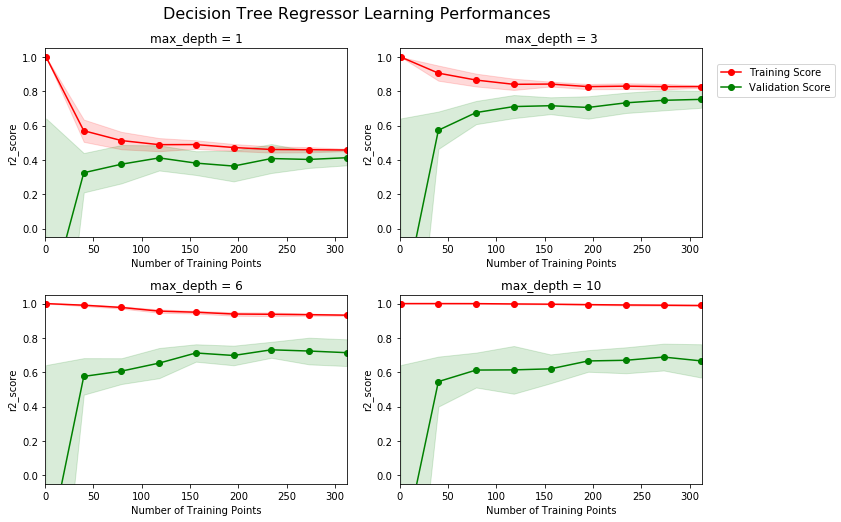

In [8]:
# 根据不同的训练集大小，和最大深度，生成学习曲线
vs.ModelLearning(X_train, y_train)

### 问题 4 - 学习曲线
*选择上述图像中的其中一个，并给出其最大深度。随着训练数据量的增加，训练集曲线的评分有怎样的变化？验证集曲线呢？如果有更多的训练数据，是否能有效提升模型的表现呢？*

**提示：**学习曲线的评分是否最终会收敛到特定的值？

### 问题 4 - 回答:

图二中，最大深度等于3，随着训练数据量的增加，训练集曲线的评分逐渐降低，验证集曲线评分逐渐增加，如果有更多数据，验证集曲线评分会增加。

### 复杂度曲线
下列代码内的区域会输出一幅图像，它展示了一个已经经过训练和验证的决策树模型在不同最大深度条件下的表现。这个图形将包含两条曲线，一个是训练集的变化，一个是验证集的变化。跟**学习曲线**相似，阴影区域代表该曲线的不确定性，模型训练和测试部分的评分都用的 `performance_metric` 函数。

运行下方区域中的代码，并利用输出的图形并回答下面的两个问题。

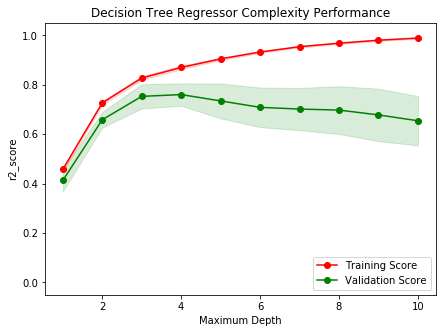

In [16]:
# 根据不同的最大深度参数，生成复杂度曲线
vs.ModelComplexity(X_train, y_train)

### 问题 5 - 偏差（bias）与方差（variance）之间的权衡取舍
*当模型以最大深度 1训练时，模型的预测是出现很大的偏差还是出现了很大的方差？当模型以最大深度10训练时，情形又如何呢？图形中的哪些特征能够支持你的结论？*
  
**提示：** 你如何得知模型是否出现了偏差很大或者方差很大的问题？

### 问题 5 - 回答:

当模型以最大深度1训练时，训练集曲线分数和测试集训练分数收敛并且相当高时，这实质上表示模型具有偏差。无论我们向其提供多少数据，模型都无法表示基本关系，因而出现系统性的高误差。
当模型以最大深度10训练时，训练集曲线分数与测试集训练分数之间的差距很大，这实质上表示模型具有高方差。与偏差模型不同的是，如果有更多可供学习的数据，或者能简化表示数据的最重要特征的模型，则通常可以改进具有方差的模型。

### 问题 6- 最优模型的猜测
*结合问题 5 中的图，你认为最大深度是多少的模型能够最好地对未见过的数据进行预测？你得出这个答案的依据是什么？*

### 问题 6 - 回答:

最大深度为3的时候，模型能最好地对未见过的数据进行预测。R^2较高且偏差和方差较低。

---
## 第五步. 选择最优参数

### 问题 7- 网格搜索（Grid Search）
*什么是网格搜索法？如何用它来优化模型？*


### 问题 7 - 回答:

遍历给定的参数组合来优化模型表现的方法。

### 问题 8 - 交叉验证
- 什么是K折交叉验证法（k-fold cross-validation）？
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)是如何结合交叉验证来完成对最佳参数组合的选择的？
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)中的`'cv_results_'`属性能告诉我们什么？
- 网格搜索时如果不使用交叉验证会有什么问题？交叉验证又是如何解决这个问题的？

**提示：** 在下面 fit_model函数最后加入 `print pd.DataFrame(grid.cv_results_)` 可以帮你查看更多信息。

### 问题 8 - 回答：

K折交叉验证法
1、将训练数据评分到相同大小的k个容器
2、假设有200个数据点,设置10个容器（k = 10），每个容器里面就有20个数据点
3、其中一个容器作为验证容器，另外k-1个作为训练集，运行10次单独的学习实验,将十个不同的测试集对于十个不同的保留集的表现进行求平均值

### 编程练习 4：训练最优模型
在这个练习中，你将需要将所学到的内容整合，使用**决策树算法**训练一个模型。为了得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 `'max_depth'` 参数。你可以把`'max_depth'` 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是**监督学习算法**中的一种。

在下方 `fit_model` 函数中，你需要做的是：
1. **定义 `'cross_validator'` 变量**: 使用 `sklearn.model_selection` 中的 [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) 创建一个交叉验证生成器对象;
2. **定义 `'regressor'` 变量**: 使用  `sklearn.tree` 中的 [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 创建一个决策树的回归函数;
3. **定义 `'params'` 变量**: 为 `'max_depth'` 参数创造一个字典，它的值是从1至10的数组;
4. **定义 `'scoring_fnc'` 变量**: 使用 `sklearn.metrics` 中的 [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)  创建一个评分函数；
 将 `‘performance_metric’` 作为参数传至这个函数中；
5. **定义 `'grid'` 变量**: 使用 `sklearn.model_selection` 中的 [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 创建一个网格搜索对象；将变量`'regressor'`, `'params'`, `'scoring_fnc'`和 `'cross_validator'` 作为参数传至这个对象构造函数中；
  
如果你对python函数的默认参数定义和传递不熟悉，可以参考这个MIT课程的[视频](http://cn-static.udacity.com/mlnd/videos/MIT600XXT114-V004200_DTH.mp4)。

In [29]:
# TODO 4

#提示: 导入 'KFold' 'DecisionTreeRegressor' 'make_scorer' 'GridSearchCV' 

from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit


def fit_model(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    cv_sets = KFold(n_splits=2, random_state=None, shuffle=False)
    #cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    regressor = DecisionTreeRegressor()

    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)
    
    # 返回网格搜索后的最优模型
    return grid.best_estimator_


### 编程练习 4：训练最优模型 （可选）
在这个练习中，你将需要将所学到的内容整合，使用**决策树算法**训练一个模型。为了得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 `'max_depth'` 参数。你可以把`'max_depth'` 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是**监督学习算法**中的一种。

在下方 `fit_model` 函数中，你需要做的是：

- 遍历参数`‘max_depth’`的可选值 1～10，构造对应模型
- 计算当前模型的交叉验证分数
- 返回最优交叉验证分数对应的模型

In [30]:
# TODO 4 可选

'''
不允许使用 DecisionTreeRegressor 以外的任何 sklearn 库

提示: 你可能需要实现下面的 cross_val_score 函数

def cross_val_score(estimator, X, y, scoring = performance_metric, cv=3):
    """ 返回每组交叉验证的模型分数的数组 """
    scores = [0,0,0]
    return scores
'''

def fit_model2(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    
    #最优交叉验证分数对应的最优模型
    best_estimator = None
    
    return best_estimator

### 问题 9 - 最优模型
*最优模型的最大深度（maximum depth）是多少？此答案与你在**问题 6**所做的猜测是否相同？*

运行下方区域内的代码，将决策树回归函数代入训练数据的集合，以得到最优化的模型。

In [31]:
# 基于训练数据，获得最优模型
optimal_reg = fit_model(X_train, y_train)

# 输出最优模型的 'max_depth' 参数
print "Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


### 问题 9 - 回答：

最优模型的最大深度是4。问题6猜测是3。

## 第六步. 做出预测
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据*提问*，并返回对**目标变量**的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

### 问题 10 - 预测销售价格
想像你是一个在波士顿地区的房屋经纪人，并期待使用此模型以帮助你的客户评估他们想出售的房屋。你已经从你的三个客户收集到以下的资讯:

| 特征 | 客戶 1 | 客戶 2 | 客戶 3 |
| :---: | :---: | :---: | :---: |
| 房屋内房间总数 | 5 间房间 | 4 间房间 | 8 间房间 |
| 社区贫困指数（％被认为是贫困阶层） | 17% | 32% | 3% |
| 邻近学校的学生-老师比例 | 15：1 | 22：1 | 12：1 |

*你会建议每位客户的房屋销售的价格为多少？从房屋特征的数值判断，这样的价格合理吗？为什么？* 

**提示：**用你在**分析数据**部分计算出来的统计信息来帮助你证明你的答案。

运行下列的代码区域，使用你优化的模型来为每位客户的房屋价值做出预测。

In [32]:
# 生成三个客户的数据
client_data = [[5, 17, 15], # 客户 1
               [4, 32, 22], # 客户 2
               [8, 3, 12]]  # 客户 3

# 进行预测
predicted_price = optimal_reg.predict(client_data)
for i, price in enumerate(predicted_price):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


### 问题 10 - 回答：

客户1房屋销售价格是$403,025.00，客户2是$237,478.72，客户3是$931,636.36，价格合理。房间数量多代表房屋面积大，价格自然高；富人社区比穷人社区房价高；学生-老师比例对价格影响不大。

### 编程练习 5
你刚刚预测了三个客户的房子的售价。在这个练习中，你将用你的最优模型在整个测试数据上进行预测, 并计算相对于目标变量的决定系数 R<sup>2</sup>的值**。

In [41]:
#TODO 5

# 提示：你可能需要用到 X_test, y_test, optimal_reg, performance_metric

# 提示：你可能需要参考问题10的代码进行预测

# 提示：你可能需要参考问题3的代码来计算R^2的值
# from sklearn.metrics import r2_score
# def performance_metric(y_true, y_predict):
#     """计算并返回预测值相比于预测值的分数"""

#     score = r2_score(y_true, y_predict)

#     return score
# predicted_price = optimal_reg.predict(y_test)
# print predicted_price
# score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])

predicted_price = optimal_reg.predict(X_test)


r2 = performance_metric(y_test, predicted_price)


print "Optimal model has R^2 score {:,.2f} on test data".format(r2)

451    401100.0
84     501900.0
434    319200.0
472    147000.0
428    247800.0
312    388500.0
30     266700.0
220    980700.0
482    367500.0
231    489300.0
9      396900.0
124    394800.0
422    268800.0
204    405300.0
360    279300.0
70     508200.0
430    264600.0
431    296100.0
364    228900.0
211    451500.0
78     445200.0
181    621600.0
424    359100.0
55     743400.0
76     420000.0
77     436800.0
154    357000.0
265    672000.0
271    743400.0
381    105000.0
         ...   
397    147000.0
478    485100.0
420    182700.0
104    422100.0
335    361200.0
468    445200.0
474    285600.0
79     426300.0
298    426300.0
316    466200.0
82     520800.0
131    411600.0
310    485100.0
290    462000.0
390    585900.0
479    413700.0
117    403200.0
340    506100.0
86     472500.0
75     449400.0
429    312900.0
15     417900.0
209    489300.0
378    275100.0
19     382200.0
317    405300.0
376    289800.0
56     518700.0
275    422100.0
398    151200.0
Name: MEDV, Length: 98, 

### 问题11 - 分析决定系数

你刚刚计算了最优模型在测试集上的决定系数，你会如何评价这个结果？

R^2 = 0.84， 比较接近完美预测1，所以模型预测较准确合理。

### 问题11 - 回答

### 模型健壮性

一个最优的模型不一定是一个健壮模型。有的时候模型会过于复杂或者过于简单，以致于难以泛化新增添的数据；有的时候模型采用的学习算法并不适用于特定的数据结构；有的时候样本本身可能有太多噪点或样本过少，使得模型无法准确地预测目标变量。这些情况下我们会说模型是欠拟合的。

### 问题 12 - 模型健壮性

模型是否足够健壮来保证预测的一致性？

**提示**: 执行下方区域中的代码，采用不同的训练和测试集执行 `fit_model` 函数10次。注意观察对一个特定的客户来说，预测是如何随训练数据的变化而变化的。

In [42]:
# 请先注释掉 fit_model 函数里的所有 print 语句
vs.PredictTrials(features, prices, fit_model, client_data)

447     449400.0
457     289800.0
386     174300.0
361     275100.0
221     661500.0
59      411600.0
378     275100.0
382     132300.0
154     357000.0
463     483000.0
474     285600.0
65      493500.0
295     701400.0
45      405300.0
299     338100.0
55      743400.0
179     682500.0
322     466200.0
402     176400.0
436     373800.0
124     394800.0
225    1014300.0
191     636300.0
410     228900.0
379     262500.0
403     350700.0
160     567000.0
453     417900.0
49      407400.0
306     415800.0
         ...    
327     432600.0
298     426300.0
156     275100.0
328     399000.0
451     401100.0
138     279300.0
212     483000.0
104     422100.0
343     382200.0
339     480900.0
344     432600.0
215     577500.0
415     338100.0
189     611100.0
214     455700.0
204     405300.0
234     466200.0
259     434700.0
67      462000.0
24      327600.0
216     632100.0
223     665700.0
129     300300.0
111     478800.0
166     365400.0
408     174300.0
385     254100.0
40      732900

Name: MEDV, Length: 195, dtype: float64
[ 420933.33333333  459816.          498540.          420933.33333333
  554400.          179900.          420933.33333333  548100.
  420933.33333333  498540.          525000.          459816.          459816.
  430500.          420933.33333333  498540.          635100.          246750.
  246750.          333433.33333333  384615.          420933.33333333
  420933.33333333  420933.33333333  179900.          682500.          384615.
  420933.33333333  515550.          635100.          635100.          179900.
  749280.          635100.          384615.          749280.          384615.
  459816.          682500.          179900.          420933.33333333
  459816.          515550.          256666.66666667  635100.          326287.5
  515550.          459816.          682500.          420933.33333333
  256666.66666667  420933.33333333  728175.          420933.33333333
  384615.          498540.          635100.          812700.
  420933.33333333  42093

Name: MEDV, Length: 196, dtype: float64
[  421436.84210526   319200.           319200.           241690.90909091
   625800.           436800.           201600.           151200.           323400.
   421436.84210526   289100.           520800.           697200.           445410.
   321300.           697200.           508200.           458500.           162750.
   296800.           455700.          1018500.           672000.
   421436.84210526   201600.           421436.84210526   523600.           289100.
   426300.           426300.           508200.           523600.           304500.
   458500.           783300.           321300.           495075.
   421436.84210526   373800.           426300.           455700.           409500.
   421436.84210526   228900.           426300.           382200.           289800.
   338100.           558600.           523600.           609000.           596400.
   421436.84210526   644700.           533400.           241690.90909091
   421436.84210526  

[ 431363.01369863  513130.43478261  273962.5         431363.01369863
  273962.5         714969.23076923  513130.43478261  643860.          894600.
  431363.01369863  431363.01369863  513130.43478261  714969.23076923
  273962.5         431363.01369863  431363.01369863  714969.23076923
  273962.5         431363.01369863  643860.          385050.
  431363.01369863  431363.01369863  431363.01369863  431363.01369863
  575400.          643860.          431363.01369863  273962.5         273962.5
  513130.43478261  273962.5         513130.43478261  385050.
  513130.43478261  273962.5         273962.5         273962.5
  513130.43478261  273962.5         643860.          431363.01369863
  273962.5         513130.43478261  431363.01369863  513130.43478261
  385050.          273962.5         513130.43478261  431363.01369863
  714969.23076923  513130.43478261  431363.01369863  273962.5         273962.5
  431363.01369863  894600.          714969.23076923  273962.5
  513130.43478261  273962.5        

  431550.        ]
307    485100.0
58     489300.0
424    359100.0
78     445200.0
439    266700.0
249    756000.0
324    443100.0
101    556500.0
223    665700.0
180    554400.0
463    483000.0
179    682500.0
465    525000.0
426    323400.0
328    399000.0
18     424200.0
40     732900.0
380    178500.0
162    525000.0
41     558600.0
146    327600.0
415    338100.0
477    514500.0
286    426300.0
485    432600.0
257    644700.0
80     588000.0
46     420000.0
139    373800.0
135    380100.0
         ...   
53     491400.0
227    504000.0
456    625800.0
487    462000.0
154    357000.0
251    709800.0
158    510300.0
44     445200.0
113    392700.0
310    485100.0
211    451500.0
108    415800.0
169    495600.0
79     426300.0
461    306600.0
84     501900.0
8      346500.0
32     277200.0
99     697200.0
425    386400.0
401    184800.0
222    510300.0
28     386400.0
360    279300.0
55     743400.0
464    497700.0
407    245700.0
400    218400.0
48     302400.0
403    350700.0
Name:

Trial 2: $419,700.00
317     405300.0
286     426300.0
7       569100.0
227     504000.0
408     174300.0
203     455700.0
394     361200.0
188     653100.0
223     665700.0
364     228900.0
346     455700.0
424     359100.0
161     476700.0
28      386400.0
269     737100.0
440     283500.0
226     609000.0
468     445200.0
300     464100.0
68      365400.0
446     424200.0
236     369600.0
386     174300.0
365     237300.0
331     346500.0
314     516600.0
409     214200.0
120     462000.0
402     176400.0
173     516600.0
         ...    
164     499800.0
105     409500.0
241     550200.0
423     220500.0
253    1024800.0
262     512400.0
383     117600.0
297     478800.0
82      520800.0
418     281400.0
71      455700.0
87      466200.0
64      693000.0
270     953400.0
93      525000.0
305     373800.0
274     462000.0
475     422100.0
378     275100.0
306     415800.0
396     342300.0
153     407400.0
101     556500.0
382     132300.0
5       602700.0
44      445200.0
113     39

Name: MEDV, Length: 195, dtype: float64
[ 327313.63636364  514994.11764706  567840.          448875.
  695672.72727273  407884.61538462  413077.77777778  413077.77777778
  448875.          695672.72727273  327313.63636364  413077.77777778
  327313.63636364  514994.11764706  262389.47368421  407884.61538462
  413077.77777778  472200.          637269.23076923  327313.63636364
  448875.          413077.77777778  382900.          413077.77777778
  567840.          514994.11764706  287700.          407884.61538462
  327313.63636364  413077.77777778  413077.77777778  514994.11764706
  972300.          407884.61538462  327313.63636364  327313.63636364
  413077.77777778  413077.77777778  287700.          182100.          182100.
  413077.77777778  695672.72727273  472200.          413077.77777778
  413077.77777778  972300.          327313.63636364  413077.77777778
  413077.77777778  413077.77777778  448875.          472200.
  327313.63636364  327313.63636364  262389.47368421  327313.63636364
 

317     405300.0
286     426300.0
7       569100.0
227     504000.0
408     174300.0
203     455700.0
394     361200.0
188     653100.0
223     665700.0
364     228900.0
346     455700.0
424     359100.0
161     476700.0
28      386400.0
269     737100.0
440     283500.0
226     609000.0
468     445200.0
300     464100.0
68      365400.0
446     424200.0
236     369600.0
386     174300.0
365     237300.0
331     346500.0
314     516600.0
409     214200.0
120     462000.0
402     176400.0
173     516600.0
         ...    
164     499800.0
105     409500.0
241     550200.0
423     220500.0
253    1024800.0
262     512400.0
383     117600.0
297     478800.0
82      520800.0
418     281400.0
71      455700.0
87      466200.0
64      693000.0
270     953400.0
93      525000.0
305     373800.0
274     462000.0
475     422100.0
378     275100.0
306     415800.0
396     342300.0
153     407400.0
101     556500.0
382     132300.0
5       602700.0
44      445200.0
113     392700.0
220     980700

Name: MEDV, Length: 195, dtype: float64
[ 384881.53846154  507774.32432432  507774.32432432  384881.53846154
  507774.32432432  260137.5         507774.32432432  384881.53846154
  507774.32432432  260137.5         507774.32432432  507774.32432432
  507774.32432432  507774.32432432  507774.32432432  384881.53846154
  384881.53846154  507774.32432432  384881.53846154  260137.5
  507774.32432432  507774.32432432  507774.32432432  384881.53846154
  507774.32432432  384881.53846154  384881.53846154  507774.32432432
  260137.5         507774.32432432  260137.5         260137.5         260137.5
  507774.32432432  384881.53846154  775818.75        507774.32432432
  260137.5         384881.53846154  507774.32432432  260137.5
  384881.53846154  384881.53846154  384881.53846154  384881.53846154
  260137.5         384881.53846154  507774.32432432  507774.32432432
  384881.53846154  384881.53846154  507774.32432432  507774.32432432
  260137.5         507774.32432432  507774.32432432  384881.5384615

334    367500.0
107    428400.0
59     411600.0
244    621600.0
10     315000.0
55     743400.0
442    420000.0
210    602700.0
56     518700.0
229    661500.0
326    388500.0
193    732900.0
88     495600.0
259    434700.0
24     327600.0
111    478800.0
114    388500.0
190    699300.0
387    178500.0
191    636300.0
391    361200.0
31     304500.0
409    214200.0
460    252000.0
369    220500.0
166    365400.0
438    296100.0
328    399000.0
302    453600.0
271    743400.0
         ...   
41     558600.0
280    783300.0
373    317100.0
231    489300.0
245    898800.0
367    184800.0
323    434700.0
306    415800.0
263    739200.0
29     441000.0
238    510300.0
250    632100.0
162    525000.0
149    323400.0
376    289800.0
364    228900.0
94     432600.0
482    367500.0
221    661500.0
85     558600.0
187    764400.0
89     602700.0
388    105000.0
34     283500.0
217    940800.0
72     478800.0
220    980700.0
296    592200.0
365    237300.0
455    487200.0
Name: MEDV, Length: 196,

   294000.   940800.   478800.   980700.   592200.   237300.   487200.]
Trial 4: $420,622.22
411     231000.0
334     367500.0
142     281400.0
120     462000.0
463     483000.0
229     661500.0
221     661500.0
225    1014300.0
213     560700.0
205     470400.0
188     653100.0
488     249900.0
24      327600.0
76      420000.0
82      520800.0
397     147000.0
482     367500.0
336     485100.0
13      428400.0
163     499800.0
219     663600.0
470     432600.0
175     781200.0
307     485100.0
152     321300.0
160     567000.0
430     264600.0
272     966000.0
245     898800.0
25      291900.0
         ...    
132     483000.0
285     569100.0
177     760200.0
440     283500.0
348     474600.0
414     296100.0
19      382200.0
48      302400.0
276     487200.0
432     273000.0
378     275100.0
116     445200.0
447     449400.0
235     497700.0
467     432600.0
390     585900.0
246     459900.0
354     459900.0
111     478800.0
458     279300.0
473     170100.0
37      441000.0
118   

Name: MEDV, Length: 195, dtype: float64
[  309781.81818182   407514.54545455   595827.27272727   684900.
   595827.27272727   684900.           309781.81818182   407514.54545455
   407514.54545455   504091.30434783   309781.81818182   684900.           378600.
   472210.34482759   309781.81818182   472210.34482759   309781.81818182
   922425.           309781.81818182   472210.34482759   378600.
   407514.54545455   595827.27272727   595827.27272727   309781.81818182
   407514.54545455   684900.           684900.           407514.54545455
   407514.54545455   504091.30434783   595827.27272727   684900.
   309781.81818182   407514.54545455   407514.54545455   265912.5
   504091.30434783   309781.81818182   309781.81818182   504091.30434783
   407514.54545455   684900.           378600.           684900.           378600.
   595827.27272727   378600.           472210.34482759   190260.
   595827.27272727   309781.81818182   504091.30434783   472210.34482759
   407514.54545455   309781.81

Name: MEDV, Length: 195, dtype: float64
[  346762.5          437256.52173913   520800.           646100.           550200.
   737800.           282046.15384615   437256.52173913   380625.
   509366.66666667   282046.15384615   723450.           485100.
   535733.33333333   282046.15384615   535733.33333333   308466.66666667
   913500.           346762.5          428400.           405300.           257600.
   699300.           655900.           361200.           405020.           628950.
   646100.           437256.52173913   437256.52173913   509366.66666667
   655900.           646800.           361200.           430500.           430500.
   147000.           483000.           282046.15384615   346762.5
   509366.66666667   405020.           646800.           291900.           646800.
   455700.           500850.           455700.           535733.33333333
   170100.           500850.           282046.15384615   472500.           471100.
   257600.           282046.15384615   437256.5

431     296100.0
468     445200.0
337     514500.0
178     795900.0
81      501900.0
57      663600.0
408     174300.0
121     426300.0
26      348600.0
242     512400.0
406     281400.0
4       760200.0
305     373800.0
77      436800.0
427     226800.0
283     455700.0
135     380100.0
218     789600.0
363     218400.0
466     457800.0
479     413700.0
155     327600.0
249     756000.0
284     600600.0
420     182700.0
227     504000.0
342     632100.0
2       728700.0
36      420000.0
29      441000.0
         ...    
149     323400.0
21      411600.0
183     625800.0
0       504000.0
387     178500.0
52      525000.0
126     329700.0
294     596400.0
44      445200.0
434     319200.0
164     499800.0
483     352800.0
313     525000.0
486     501900.0
311     428400.0
94      432600.0
109     407400.0
359     291900.0
252     905100.0
58      489300.0
393     315000.0
306     415800.0
456     625800.0
87      466200.0
360     279300.0
385     254100.0
197    1018500.0
439     266700

Name: MEDV, Length: 195, dtype: float64
[ 424171.62162162  424171.62162162  424171.62162162  424171.62162162
  326635.13513514  626325.          848050.          424171.62162162
  424171.62162162  326635.13513514  424171.62162162  424171.62162162
  722972.72727273  424171.62162162  424171.62162162  326635.13513514
  722972.72727273  626325.          626325.          626325.
  231884.21052632  603911.53846154  424171.62162162  326635.13513514
  626325.          603911.53846154  326635.13513514  231884.21052632
  424171.62162162  231884.21052632  326635.13513514  424171.62162162
  231884.21052632  326635.13513514  487973.68421053  231884.21052632
  487973.68421053  424171.62162162  326635.13513514  424171.62162162
  326635.13513514  603911.53846154  722972.72727273  848050.
  326635.13513514  626325.          487973.68421053  424171.62162162
  603911.53846154  326635.13513514  722972.72727273  424171.62162162
  231884.21052632  424171.62162162  424171.62162162  487973.68421053
  487973.6

   953400.        ]
69     438900.0
87     466200.0
114    388500.0
352    352800.0
419    201600.0
358    315000.0
196    888300.0
167    401100.0
104    422100.0
407    245700.0
483    352800.0
77     436800.0
192    726600.0
54     396900.0
19     382200.0
461    306600.0
178    795900.0
257    644700.0
255    766500.0
215    577500.0
402    176400.0
193    732900.0
130    403200.0
453    417900.0
100    577500.0
171    617400.0
425    386400.0
366    258300.0
444    371700.0
143    327600.0
         ...   
146    327600.0
125    449400.0
86     472500.0
30     266700.0
431    296100.0
65     493500.0
203    455700.0
205    470400.0
44     445200.0
27     310800.0
80     588000.0
437    312900.0
113    392700.0
399    157500.0
204    405300.0
7      569100.0
208    525000.0
158    510300.0
112    394800.0
411    231000.0
446    424200.0
231    489300.0
228    527100.0
8      346500.0
73     491400.0
400    218400.0
118    428400.0
189    611100.0
206    590100.0
355    485100.0
Name

Name: MEDV, Length: 195, dtype: float64
[ 408218.02325581  408218.02325581  408218.02325581  408218.02325581
  408218.02325581  408218.02325581  408218.02325581  791437.5         791437.5
  408218.02325581  791437.5         408218.02325581  408218.02325581
  408218.02325581  408218.02325581  791437.5         408218.02325581
  791437.5         408218.02325581  408218.02325581  791437.5
  408218.02325581  408218.02325581  408218.02325581  408218.02325581
  408218.02325581  791437.5         791437.5         408218.02325581
  408218.02325581  408218.02325581  408218.02325581  408218.02325581
  408218.02325581  408218.02325581  791437.5         408218.02325581
  408218.02325581  408218.02325581  408218.02325581  408218.02325581
  408218.02325581  408218.02325581  408218.02325581  408218.02325581
  408218.02325581  408218.02325581  791437.5         791437.5         791437.5
  408218.02325581  408218.02325581  791437.5         408218.02325581
  408218.02325581  408218.02325581  408218.0232558

Name: MEDV, Length: 196, dtype: float64
[ 509727.27272727  528150.          283984.61538462  318600.          720300.
  414225.          408758.82352941  243950.          408758.82352941
  589400.          408758.82352941  408758.82352941  408758.82352941
  318600.          408758.82352941  720300.          283984.61538462
  509727.27272727  509727.27272727  408758.82352941  509727.27272727
  243950.          689850.          408758.82352941  417000.          589400.
  466200.          375900.          417000.          644700.          318600.
  408758.82352941  408758.82352941  417000.          283984.61538462
  283984.61538462  449700.          417000.          459900.          457380.
  589400.          414225.          375900.          243950.          292600.
  509727.27272727  689850.          589400.          505575.
  408758.82352941  414225.          408758.82352941  283984.61538462
  417000.          789600.          408758.82352941  589400.
  283984.61538462  283984.61538462

215    577500.0
56     518700.0
109    407400.0
409    214200.0
178    795900.0
66     407400.0
46     420000.0
420    182700.0
17     367500.0
241    550200.0
260    443100.0
259    434700.0
475    422100.0
451    401100.0
415    338100.0
4      760200.0
434    319200.0
240    514500.0
90     474600.0
209    489300.0
464    497700.0
366    258300.0
192    726600.0
61     336000.0
112    394800.0
179    682500.0
339    480900.0
421    176400.0
115    384300.0
256    478800.0
         ...   
343    382200.0
274    462000.0
384    151200.0
452    422100.0
347    476700.0
34     283500.0
428    247800.0
337    514500.0
424    359100.0
379    262500.0
191    636300.0
254    651000.0
392    577500.0
403    350700.0
170    474600.0
86     472500.0
267    695100.0
471    319200.0
64     693000.0
321    407400.0
242    512400.0
94     432600.0
14     382200.0
47     348600.0
268    611100.0
463    483000.0
226    609000.0
390    585900.0
272    966000.0
299    338100.0
Name: MEDV, Length: 196,

  340267.74193548  894000.          704676.        ]
321    407400.0
14     382200.0
212    483000.0
421    176400.0
442    420000.0
3      701400.0
479    413700.0
59     411600.0
289    520800.0
296    592200.0
451    401100.0
98     919800.0
280    783300.0
40     732900.0
162    525000.0
146    327600.0
423    220500.0
449    399000.0
194    690900.0
155    327600.0
206    590100.0
79     426300.0
292    695100.0
28     386400.0
41     558600.0
354    459900.0
386    174300.0
22     319200.0
367    184800.0
109    407400.0
         ...   
342    632100.0
93     525000.0
69     438900.0
36     420000.0
160    567000.0
11     396900.0
144    247800.0
344    432600.0
127    340200.0
384    151200.0
9      396900.0
364    228900.0
176    835800.0
231    489300.0
210    602700.0
128    378000.0
143    327600.0
241    550200.0
7      569100.0
254    651000.0
360    279300.0
456    625800.0
8      346500.0
156    275100.0
27     310800.0
266    697200.0
64     693000.0
255    766500.0
308

[ 497700.          436100.          617400.          520800.          632100.
  695100.          183400.          410454.54545455  490753.84615385
  427700.          285000.          410454.54545455  520800.          436100.
  478476.92307692  285000.          760200.          746900.          436100.
  183400.          470400.          183400.          285000.          534800.
  558600.          632100.          228900.          546000.          436100.
  437062.5         285000.          310800.          546000.
  410454.54545455  534800.          490753.84615385  953400.
  490753.84615385  478476.92307692  410454.54545455  436100.          285000.
  183400.          436100.          410454.54545455  627900.          333900.
  183400.          437062.5         183400.          558600.          409500.
  478476.92307692  183400.          310100.          310100.
  410454.54545455  530600.          346500.          761250.          285000.
  478476.92307692  478476.92307692  470400.   

364    228900.0
454    411600.0
286    426300.0
260    443100.0
331    346500.0
417    245700.0
251    709800.0
80     588000.0
95     596400.0
146    327600.0
263    739200.0
22     319200.0
53     491400.0
292    695100.0
256    478800.0
387    178500.0
25     291900.0
11     396900.0
392    577500.0
224    875700.0
111    478800.0
185    777000.0
243    520800.0
400    218400.0
378    275100.0
471    319200.0
165    468300.0
233    422100.0
301    407400.0
362    214200.0
         ...   
445    409500.0
355    485100.0
395    375900.0
295    701400.0
483    352800.0
23     304500.0
171    617400.0
262    512400.0
330    686700.0
42     531300.0
106    409500.0
212    483000.0
457    289800.0
332    501900.0
142    281400.0
308    441000.0
415    338100.0
82     520800.0
416    300300.0
116    445200.0
462    449400.0
303    499800.0
257    644700.0
261    529200.0
148    373800.0
128    378000.0
438    296100.0
145    289800.0
164    499800.0
277    468300.0
Name: MEDV, Length: 196,

Name: MEDV, Length: 195, dtype: float64
[ 642075.          290424.32432432  691016.66666667  446351.61290323
  446351.61290323  446351.61290323  446351.61290323  642075.          409800.
  446351.61290323  420420.          290424.32432432  158200.
  290424.32432432  446351.61290323  446351.61290323  691016.66666667
  290424.32432432  290424.32432432  368025.          528675.
  290424.32432432  446351.61290323  290424.32432432  446351.61290323
  505470.          446351.61290323  413576.47058824  691016.66666667
  492900.          905100.          505470.          446351.61290323
  290424.32432432  505470.          413576.47058824  158200.          315000.
  446351.61290323  368025.          290424.32432432  290424.32432432
  290424.32432432  290424.32432432  420420.          420420.          409800.
  413576.47058824  389760.          446351.61290323  290424.32432432
  691016.66666667  691016.66666667  691016.66666667  691016.66666667
  413576.47058824  763140.          347550.         

[ 632100.          232050.          662340.          418950.          481950.
  481950.          446600.          646800.          457800.          488250.
  455700.          174300.          176400.          291717.39130435
  418950.          455700.          795900.          291717.39130435
  232050.          352800.          556500.          252000.          488250.
  291717.39130435  404250.          462000.          446600.          455700.
  592200.          459900.          905100.          485100.          417900.
  291717.39130435  538125.          392700.          147000.          315000.
  404250.          399000.          291717.39130435  291717.39130435
  289800.          291717.39130435  441000.          403200.          392700.
  471450.          382200.          463050.          291717.39130435
  609000.          783300.          730800.          662340.          408800.
  726600.          369600.          569100.          867300.          408800.
  390600.          408

  504650.70422535  504650.70422535  732150.          401717.64705882]
389    249900.0
229    661500.0
42     531300.0
122    430500.0
346    455700.0
249    756000.0
13     428400.0
310    485100.0
302    453600.0
36     420000.0
71     455700.0
124    394800.0
69     438900.0
316    466200.0
449    399000.0
138    279300.0
192    726600.0
132    483000.0
21     411600.0
277    468300.0
97     812700.0
465    525000.0
74     506100.0
231    489300.0
212    483000.0
81     501900.0
180    554400.0
429    312900.0
411    231000.0
200    472500.0
         ...   
206    590100.0
73     491400.0
8      346500.0
222    510300.0
45     405300.0
262    512400.0
27     310800.0
3      701400.0
16     485100.0
423    220500.0
41     558600.0
396    342300.0
272    966000.0
474    285600.0
324    443100.0
79     426300.0
164    499800.0
477    514500.0
295    701400.0
369    220500.0
183    625800.0
177    760200.0
93     525000.0
168    485100.0
201    512400.0
82     520800.0
158    510300.0
85

154    357000.0
130    403200.0
416    300300.0
308    441000.0
10     315000.0
86     472500.0
35     396900.0
213    560700.0
28     386400.0
461    306600.0
303    499800.0
472    147000.0
107    428400.0
198    474600.0
481    445200.0
281    585900.0
339    480900.0
29     441000.0
11     396900.0
142    281400.0
393    315000.0
345    373800.0
488    249900.0
353    577500.0
67     462000.0
361    275100.0
298    426300.0
314    516600.0
473    170100.0
325    409500.0
         ...   
120    462000.0
380    178500.0
234    466200.0
318    474600.0
440    283500.0
458    279300.0
187    764400.0
238    510300.0
444    371700.0
384    151200.0
221    661500.0
417    245700.0
347    476700.0
117    403200.0
248    924000.0
241    550200.0
250    632100.0
296    592200.0
59     411600.0
436    373800.0
22     319200.0
65     493500.0
125    449400.0
406    281400.0
251    709800.0
56     518700.0
438    296100.0
126    329700.0
348    474600.0
382    132300.0
Name: MEDV, Length: 195,

Trial 10: $413,700.00

Range in prices: $36,726.07


### 问题 12 - 回答：

预测在一定范围内波动。

### 问题 13 - 实用性探讨
*简单地讨论一下你建构的模型能否在现实世界中使用？* 

提示：回答以下几个问题，并给出相应结论的理由：
- *1978年所采集的数据，在已考虑通货膨胀的前提下，在今天是否仍然适用？*
- *数据中呈现的特征是否足够描述一个房屋？*
- *在波士顿这样的大都市采集的数据，能否应用在其它乡镇地区？*
- *你觉得仅仅凭房屋所在社区的环境来判断房屋价值合理吗？*

### 问题 13 - 回答：

1、不适用，因为1978年整个经济环境与现在大有不同，人们的生活习惯价值观都有所改变，都影响房价。
2、特征太少不足够描述一个房屋，比如周围配到设施是否齐全，交通等等都会影响房价。
3、不能应用在其他乡镇地区。波士顿是大城市，有着自己固有的特征与乡镇有巨大差别。
4、不合理。特征太少，缺乏配套设施情况、交通、绿化环境等相关特征。

## 可选问题 - 预测北京房价

（本题结果不影响项目是否通过）通过上面的实践，相信你对机器学习的一些常用概念有了很好的领悟和掌握。但利用70年代的波士顿房价数据进行建模的确对我们来说意义不是太大。现在你可以把你上面所学应用到北京房价数据集中 `bj_housing.csv`。

免责声明：考虑到北京房价受到宏观经济、政策调整等众多因素的直接影响，预测结果仅供参考。

这个数据集的特征有：
- Area：房屋面积，平方米
- Room：房间数，间
- Living: 厅数，间
- School: 是否为学区房，0或1
- Year: 房屋建造时间，年
- Floor: 房屋所处楼层，层

目标变量：
- Value: 房屋人民币售价，万

你可以参考上面学到的内容，拿这个数据集来练习数据分割与重排、定义衡量标准、训练模型、评价模型表现、使用网格搜索配合交叉验证对参数进行调优并选出最佳参数，比较两者的差别，最终得出最佳模型对验证集的预测分数。

In [45]:
# TODO 6
# 1、导入数据
data = pd.read_csv('bj_housing.csv')
prices = data['Value']
features = data.drop('Value', axis = 1)

# 完成
print "Beijing housing dataset has {} data points with {} variables each.".format(*data.shape)
# 你的代码

Beijing housing dataset has 9999 data points with 7 variables each.


In [47]:
# 2、分析数据
#目标：计算价值的最小值
minimum_price = prices.min()

#目标：计算价值的最大值
maximum_price = prices.max()

#目标：计算价值的平均值
mean_price = prices.mean()

#目标：计算价值的中值
median_price = prices.median()

#目标：计算价值的标准差
std_price = prices.std()

#目标：输出计算的结果
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ￥{:,.2f}".format(minimum_price)
print "Maximum price: ￥{:,.2f}".format(maximum_price)
print "Mean price: ￥{:,.2f}".format(mean_price)
print "Median price ￥{:,.2f}".format(median_price)
print "Standard deviation of prices: ￥{:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: ￥66.00
Maximum price: ￥7,450.00
Mean price: ￥342.08
Median price ￥280.00
Standard deviation of prices: ￥259.41


In [48]:
# 3、数据重排

# 提示： 导入train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

In [52]:
# 4、训练最优模型

#提示: 导入 'KFold' 'DecisionTreeRegressor' 'make_scorer' 'GridSearchCV' 

from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit


def fit_model(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    cv_sets = KFold(n_splits=2, random_state=None, shuffle=False)
    #cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    regressor = DecisionTreeRegressor()

    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)
    
    # 返回网格搜索后的最优模型
    return grid.best_estimator_


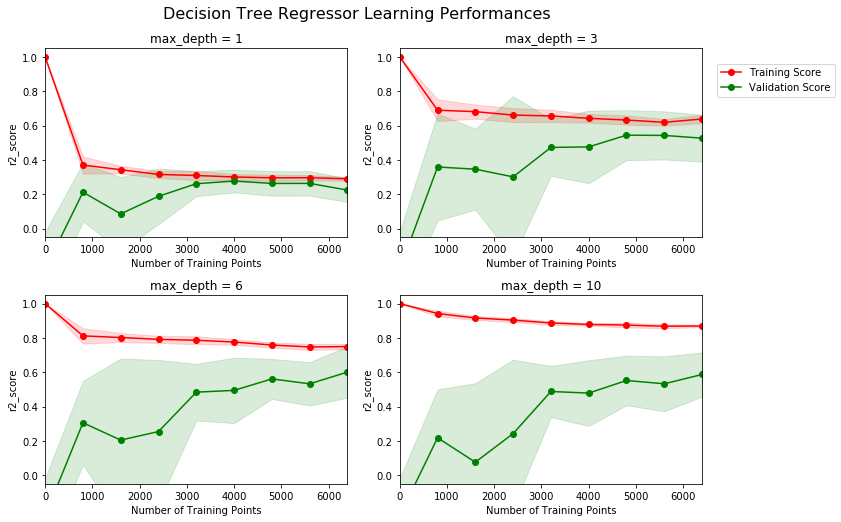

In [50]:
vs.ModelLearning(X_train, y_train)

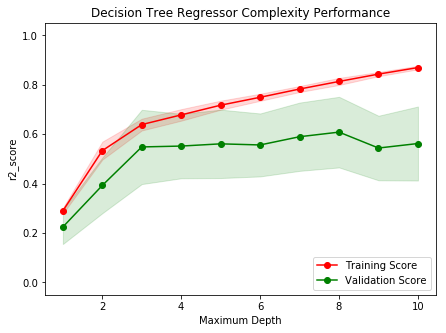

In [51]:
# 根据不同的最大深度参数，生成复杂度曲线
vs.ModelComplexity(X_train, y_train)

In [53]:
# 5、基于训练数据，获得最优模型
optimal_reg = fit_model(X_train, y_train)

# 输出最优模型的 'max_depth' 参数
print "Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth'])

9253     930
1561     350
1670     273
6086     295
7332     195
7461     220
8828     175
7944     240
3508     253
2002     325
5865     272
168      249
2588     190
6400     300
9528     295
8835     330
6510     650
4907     169
6394     448
8559     348
4891     130
9937     185
6520     170
5181     280
6646     320
7381     590
210      250
6950     340
1919     340
718     1480
        ... 
3109     180
4939     198
4059     180
1987     200
7156     270
8873     299
8928     230
383      315
5634     205
4307     208
3388     860
3156    1300
9994     293
2727     139
6332     430
6277     420
8683     260
8301     330
7928     170
3832     155
8704     530
4776     142
4276     260
253      150
9497     470
9589     163
8687     176
278      202
3252     310
2480     220
Name: Value, Length: 4000, dtype: int64
[ 295.20202851  295.20202851  295.20202851 ...,  295.20202851  295.20202851
  295.20202851]
289      260
6085     390
3075     208
8273     235
7597     197
8701     1

Name: Value, Length: 4000, dtype: int64
[ 472.09302326  336.5         391.92142857 ...,  246.79344262  246.79344262
  153.75      ]
9253     930
1561     350
1670     273
6086     295
7332     195
7461     220
8828     175
7944     240
3508     253
2002     325
5865     272
168      249
2588     190
6400     300
9528     295
8835     330
6510     650
4907     169
6394     448
8559     348
4891     130
9937     185
6520     170
5181     280
6646     320
7381     590
210      250
6950     340
1919     340
718     1480
        ... 
3109     180
4939     198
4059     180
1987     200
7156     270
8873     299
8928     230
383      315
5634     205
4307     208
3388     860
3156    1300
9994     293
2727     139
6332     430
6277     420
8683     260
8301     330
7928     170
3832     155
8704     530
4776     142
4276     260
253      150
9497     470
9589     163
8687     176
278      202
3252     310
2480     220
Name: Value, Length: 4000, dtype: int64
[ 464.65625     227.31325301  349.5

In [54]:
#6 、进行预测和计算r^2

predicted_price = optimal_reg.predict(X_test)


r2 = performance_metric(y_test, predicted_price)


print "Optimal model has R^2 score {:,.2f} on test data".format(r2)

5344    160
7444    148
1731    255
8719    280
4521    197
7453    280
576     240
7428    258
5577    245
439     120
2750    251
5730    610
5271    219
5652    193
3999    158
4556    370
582     510
6289    530
7050    170
4894    210
8697    630
2249    880
4639    165
7191    330
5872    335
6330    260
1963    300
8242    215
6589    280
8846    278
       ... 
4847    650
2291    400
2133    427
550     223
1740    230
5288    325
1817    515
9215    245
5180    217
3018    210
17      190
1770    570
1888    390
2152    315
1642    180
7915    275
4193    280
4747    185
4830    260
533     366
132     323
4864    140
8457    163
964     315
9210    550
9448    350
8284    175
7852    420
1095    134
8871    168
Name: Value, Length: 2000, dtype: int64
[ 225.81908549  219.41706161  262.31840194 ...,  359.63716814  180.75714286
  174.37724551]
Optimal model has R^2 score 0.65 on test data


In [61]:
# 7、进行预测
client_data = [[129, 3, 1, 1, 2005, 15], # 客户 1
               [60, 2, 1, 1, 1993, 3], # 客户 2
               [134, 3, 1, 1, 2000, 16]]  # 客户 3

predicted_price = optimal_reg.predict(client_data)
for i, price in enumerate(predicted_price):
    print "Predicted selling price for Client {}'s home: ￥{:,.2f}".format(i+1, price)


Predicted selling price for Client 1's home: ￥492.73
Predicted selling price for Client 2's home: ￥262.32
Predicted selling price for Client 3's home: ￥593.86


In [60]:
# 8、波动值
vs.PredictTrials(features, prices, fit_model, client_data)

7388    280
9274    270
2995    200
5316    160
356     380
49      194
9356    390
1523    230
7551    420
496     286
5110    330
1957    255
229     290
1738    325
8880    120
7566    258
4787    198
2607    390
3784    200
8878    300
1003    318
5676    410
4853    380
9441    152
9490     87
3042    490
8276    370
5979    280
2075    690
4482    220
       ... 
5631    345
9782    138
6054    265
9389    285
6931    230
3503    385
9279    530
1389    295
5730    610
7580    400
7902    499
3684    228
9341    265
1470    238
6249    158
9768    245
3587    430
1665    245
6495    238
5153    540
3104    310
4303    263
4856    540
5932    213
6647    590
204     233
9755    198
5362    360
7908    450
8764    410
Name: Value, Length: 4000, dtype: int64
[ 298.43489011  298.43489011  298.43489011 ...,  298.43489011  298.43489011
  298.43489011]
1368     320
955      195
1489     165
7408     113
5860     980
5948     158
9404     265
4744     345
3158     310
995      260
5614  

7388    280
9274    270
2995    200
5316    160
356     380
49      194
9356    390
1523    230
7551    420
496     286
5110    330
1957    255
229     290
1738    325
8880    120
7566    258
4787    198
2607    390
3784    200
8878    300
1003    318
5676    410
4853    380
9441    152
9490     87
3042    490
8276    370
5979    280
2075    690
4482    220
       ... 
5631    345
9782    138
6054    265
9389    285
6931    230
3503    385
9279    530
1389    295
5730    610
7580    400
7902    499
3684    228
9341    265
1470    238
6249    158
9768    245
3587    430
1665    245
6495    238
5153    540
3104    310
4303    263
4856    540
5932    213
6647    590
204     233
9755    198
5362    360
7908    450
8764    410
Name: Value, Length: 4000, dtype: int64
[ 237.03448276  303.91666667  204.85775862 ...,  258.52        229.6300813
  345.47368421]
1368     320
955      195
1489     165
7408     113
5860     980
5948     158
9404     265
4744     345
3158     310
995      260
5614   

  423.11449452]
5659     270
4271     196
1065     275
7396     460
9163     372
9637     177
7292     225
7815     360
9532     800
8369     195
9744     130
4367     238
1542     390
216     1250
5529     195
7851     130
8316     285
7834     600
8633     340
3443     245
4065     309
630      165
3003     530
3622     320
5005     308
9119     450
6021     220
903      485
4749     155
3693     170
        ... 
1031     770
6121     290
6285     530
1110     205
1888     390
9719     202
753      137
3049     194
8151     350
562      315
6542    1050
8093     155
4764     200
3562     255
8444     900
2516     480
2962     390
5374     405
5396     320
9394     236
3462     375
7751     195
4225     260
144      130
5056     150
2895     335
7813     185
905      185
5192     150
235      460
Name: Value, Length: 3999, dtype: int64
[ 610.77238806  232.21202532  232.21202532 ...,  348.61060802  232.21202532
  348.61060802]
4792     280
5757     153
5526     240
5721     238
3990   

4792     280
5757     153
5526     240
5721     238
3990     525
8081     750
5129     150
1717     525
6920     162
6805     142
8072     670
2209     340
1123     305
4313     205
8167     450
9422     225
1995     273
1041     310
8827     208
4427     150
4507     265
1178     298
5305     252
2835     275
4579     140
3219     950
7151     385
6281     130
3176     241
9779     263
        ... 
8054     235
5960     285
9314     565
909      315
9197     180
9714     140
2265     160
7521     460
3041     130
9717     355
9004     310
5532     850
9989     560
7379     315
9330     150
1137     260
2823     180
4088     230
9412     750
8482     210
6878     500
4630     315
4917     520
5944    1200
5667     950
9176     160
7768     498
3525     193
2374     200
1417     300
Name: Value, Length: 4000, dtype: int64
[ 319.39473684  241.60344828  283.0880829  ...,  193.13043478  247.98181818
  359.16513761]
4792     280
5757     153
5526     240
5721     238
3990     525
8081     7

[ 260.67553191  767.38040346  424.23855422 ...,  767.38040346  260.67553191
  260.67553191]
7003    598
1545    330
8135    300
7767    220
7781    380
524     350
7342    370
8071    183
8372    280
2348    390
8555    148
1696    223
537     275
741     218
9434    460
7427    185
4119    192
7578    620
169     260
3245    138
5230    330
8097    790
7707    198
2150    185
622     300
9053    260
2787    165
1445    530
7076    395
2612    115
       ... 
3638    700
9998    180
1073    290
1262    440
4576    260
8442    155
8709    910
9718    485
7075    385
7655    215
4569    800
9782    138
1951    252
8044    126
152     310
1417    300
6047    203
1327    950
5713    239
724     268
350     360
4861    290
3976    220
5310    260
4284    155
9402    275
5515    230
4729    430
7748    170
9634    575
Name: Value, Length: 4000, dtype: int64
[ 767.38040346  260.67553191  260.67553191 ...,  424.23855422  260.67553191
  424.23855422]
7003    598
1545    330
8135    300
7767    

9301     250
6651    1100
4756     280
7280     276
3474     350
3446     470
7808     455
6818     155
1855      90
7205     240
7665     920
1592     273
5302     395
8256     235
5716     180
6578     315
7241     990
2806     320
7327     105
3823     220
984      285
484      167
2636     156
3382     257
1602     145
449      800
234      460
4515     330
5931     265
7830     310
        ... 
7622     340
9518     780
3780     770
5208     236
9541     500
7491     260
255      250
4988     325
3642     280
8170     920
4147     219
5034     320
6916     230
5315      99
2727     139
6949     358
3700     220
8316     285
6548     230
2778     200
5167     162
2773     202
6751     245
433      310
4770     520
1099     198
2514     280
6637     670
2575     388
7336     178
Name: Value, Length: 3999, dtype: int64
[ 190.5         898.55555556  422.06122449 ...,  584.0625      372.82068966
  200.53846154]
9301     250
6651    1100
4756     280
7280     276
3474     350
3446     4

6703     140
3311     288
6983     420
4661     340
6415     200
9933     318
8963     320
5355     300
536      195
4505     610
1595     790
2643     275
239      310
723      380
7143     203
2144    1150
6215     275
3255     300
5470     405
1747     405
2996     255
6544     305
4893     750
1332     575
8940     275
7256     245
6122     310
570      315
6056     190
835      403
        ... 
6523     200
7713     360
4926     340
9834     200
6557     328
4718     250
7016     200
7749     315
858      213
4019     270
8127     500
2306     330
9026     252
2710     113
1498     560
3610     169
3576     330
6542    1050
1447     195
7061     350
7818     150
1705     300
7161     530
2707     210
8981     405
6400     300
9160     430
9859     295
1688     360
5994     255
Name: Value, Length: 3999, dtype: int64
[ 239.86382979  374.67611075  239.86382979 ...,  239.86382979  374.67611075
  374.67611075]
8656     355
6515     265
7358     330
863      455
5223     480
158      2

Name: Value, Length: 3999, dtype: int64
[ 214.90697674  347.39473684  286.1459854  ...,  284.4         447.10344828
  318.35443038]
6703     140
3311     288
6983     420
4661     340
6415     200
9933     318
8963     320
5355     300
536      195
4505     610
1595     790
2643     275
239      310
723      380
7143     203
2144    1150
6215     275
3255     300
5470     405
1747     405
2996     255
6544     305
4893     750
1332     575
8940     275
7256     245
6122     310
570      315
6056     190
835      403
        ... 
6523     200
7713     360
4926     340
9834     200
6557     328
4718     250
7016     200
7749     315
858      213
4019     270
8127     500
2306     330
9026     252
2710     113
1498     560
3610     169
3576     330
6542    1050
1447     195
7061     350
7818     150
1705     300
7161     530
2707     210
8981     405
6400     300
9160     430
9859     295
1688     360
5994     255
Name: Value, Length: 3999, dtype: int64
[ 232.91525424  319.29896907  290.6

[ 338.59385438  338.59385438  228.41310383 ...,  228.41310383  338.59385438
  228.41310383]
4983     200
6789     280
2221     455
6043     500
1564     390
5608     355
7139     230
8108     398
8018     190
4171     310
423      210
1068     205
8100     175
9016     365
8069     150
6979     274
6930     140
3978      90
446      315
6054     265
5722     200
2673     201
5442     470
3752     205
228      475
6322     355
484      167
1618     181
9820     380
2540     205
        ... 
1407     142
1453     260
9881     363
2432     200
5572     370
8190     285
6777     560
9126     177
1758     210
5942     360
5234     820
5292     430
7547     240
5558     420
115      300
8636     144
4136     263
2649     455
3701     600
4588     245
8034     185
5741     120
5789     270
7110     396
3161     158
6125     142
6656     420
2531     566
8570    2023
4096      99
Name: Value, Length: 4000, dtype: int64
[ 228.41310383  538.55017301  940.40517241 ...,  338.59385438  940.40517241

4983     200
6789     280
2221     455
6043     500
1564     390
5608     355
7139     230
8108     398
8018     190
4171     310
423      210
1068     205
8100     175
9016     365
8069     150
6979     274
6930     140
3978      90
446      315
6054     265
5722     200
2673     201
5442     470
3752     205
228      475
6322     355
484      167
1618     181
9820     380
2540     205
        ... 
1407     142
1453     260
9881     363
2432     200
5572     370
8190     285
6777     560
9126     177
1758     210
5942     360
5234     820
5292     430
7547     240
5558     420
115      300
8636     144
4136     263
2649     455
3701     600
4588     245
8034     185
5741     120
5789     270
7110     396
3161     158
6125     142
6656     420
2531     566
8570    2023
4096      99
Name: Value, Length: 4000, dtype: int64
[  220.83333333   413.05128205   584.5        ...,   354.19411765  2023.
   148.4       ]
4983     200
6789     280
2221     455
6043     500
1564     390
5608     355

Name: Value, Length: 3999, dtype: int64
[ 729.20661157  534.69047619  188.7806563  ...,  534.69047619  273.1145281
  534.69047619]
2402     90
4308    370
2356    510
7598    350
3279    355
7577    205
4986    228
5935    165
8680    287
7583    310
7006    470
4432    255
1326    270
6610    130
4111    215
3811    510
510     680
338     320
6453    350
4840    380
1268    280
1282    215
8595    245
8796    300
8180    600
4560    249
9923    780
2376    450
1640    410
631     260
       ... 
7833    240
3684    228
8365    240
3678    160
2771    271
4422    860
3759    230
7580    400
3159    190
6923    299
2442    210
7821    260
8575    338
3145    198
4073    560
1338    396
6857    760
1461    288
4811    300
2118    274
4508    400
5246    630
8850    165
1829    440
1873    319
7278    530
8767    130
9364    310
8314    192
6016    232
Name: Value, Length: 4000, dtype: int64
[ 188.7806563   404.53793103  391.2        ...,  238.09190031  273.1145281
  238.09190031]
2402  

2557     820
3380     770
4732     175
4035     245
4261     360
1939     590
1624     185
5939     155
359      197
7589     855
7962     210
231      265
6669     205
183      170
2294     201
2364     340
2662    1100
8348     247
7183     200
284      175
2780     330
6379     235
4407     125
1487     500
4023     160
6773     310
1820     229
445      210
7040     230
2972     194
        ... 
3898     375
9166     378
4199     455
8169     320
41       370
5482     360
377      750
9470     270
2194     470
3709     570
2004     245
3503     385
8397     920
9260     255
3185     205
7687     185
3792     650
2718     210
2672     435
2459     350
1982     215
740      286
1032     226
5520     280
7286     540
3046     680
9917     295
4079     580
2254     450
2915     435
Name: Value, Length: 3999, dtype: int64
[ 775.71428571  705.          228.77777778 ...,  436.21568627  352.13368984
  523.4556962 ]
2557     820
3380     770
4732     175
4035     245
4261     360
1939     5

Name: Value, Length: 4000, dtype: int64
[ 361.41428571  255.18932039  215.22310757 ...,  241.14511873  539.3
  450.53333333]
6591    218
9568    160
7425    299
6024     96
1670    273
6079    217
9872    200
9102    400
7910    160
5448    207
490     165
658     690
9991    395
7078    200
5832    345
350     360
7364    210
896     820
1594    310
7264    740
7624    290
5957    750
6835    255
5988    200
1907    210
1651    440
1699    255
9741    890
1774    340
1465    530
       ... 
7765    152
9538    350
6271    130
3266    175
9808    165
7230    240
2692    427
5553    285
9701    225
5317    120
5035    160
2390    390
5757    153
7045    430
9247    275
5083    505
2252    230
1288    590
1953    271
2372    270
2543    195
4122    290
7243    178
5401    145
6462    630
9040    170
8527    410
4714    198
8419    260
2761    418
Name: Value, Length: 3999, dtype: int64
[ 255.18932039  231.26666667  276.65517241 ...,  231.26666667  329.08571429
  376.33471074]
6591    218

4892    325
2595    215
5051    140
5158    253
6522    160
1250    180
4673    185
1465    530
8078    300
9648    145
5726    460
1398    280
4766    550
5358    295
5522    385
2761    418
8812    470
6242    275
4367    238
2022    245
1196    370
4512    440
1133    165
2285    530
7181    720
5658    268
7395    240
6859    223
5399    205
3451    890
       ... 
9411    430
7651    115
9353    235
8964    230
5582    630
8504    245
4859    430
2997    250
1176    142
3896    205
9541    500
3516    333
7955    950
7680    240
7084    220
8583    135
6015    312
1456    645
1092    498
6118    298
3239    260
4441    270
2583    270
7566    258
1372    500
919     291
4307    208
5699    150
537     275
9412    750
Name: Value, Length: 3999, dtype: int64
[ 285.8147714   285.8147714   285.8147714  ...,  285.8147714   285.8147714
  649.42006803]
3966     135
9840     335
4291     265
1224     160
8538     320
5576     220
2777     248
9486     225
5038     550
9342     305
2140   

[ 191.17241379  468.80246914  244.01398601 ...,  300.93728223  208.88847584
  190.        ]
3966     135
9840     335
4291     265
1224     160
8538     320
5576     220
2777     248
9486     225
5038     550
9342     305
2140     800
684      470
8411     260
2773     202
9284     140
6792     920
81       300
6843     170
5784     158
9081     520
6189     200
8993     390
1269     780
7052     385
9225     250
6922     340
5352     225
5632     510
7754     169
1789     280
        ... 
503      340
3441     220
5674     148
3804     590
769     1000
884      210
5656     405
6609     270
9742     285
6593     299
2526     180
8771     750
2440     334
4005     265
1286     350
7192     700
5388     170
3593     310
710      235
2340     205
1866     299
98       136
4986     228
1401     530
1982     215
6682     320
8804     303
5931     265
5135     260
4353     165
Name: Value, Length: 4000, dtype: int64
[ 207.25433526  561.08333333  227.31640625 ...,  332.46357616  222.22151899

1956    330
1268    280
790     405
7412    565
9082    190
745     235
2726    295
4939    198
1247    210
4263    360
8443    152
5811    238
2565    418
804     485
1142    430
8157    128
2657    404
6140    270
8479    385
7697    189
3513    340
8510    180
6056    190
1293    320
3963    210
3979    360
5058    345
724     268
2938    350
5568    345
       ... 
3947    179
7249    195
3453    155
9957    218
6466    295
4506    280
6314    130
2875    680
5045    440
4659    880
8969    680
6584    340
8462    250
7483    279
3426    270
5469    179
6287    525
9277    250
6025    265
4365    355
8812    470
458     163
4211    200
2096    250
5480    440
6995    278
2181    800
2033    260
9556    299
4547    305
Name: Value, Length: 3999, dtype: int64
[ 241.95913682  241.95913682  381.99930748 ...,  241.95913682  241.95913682
  381.99930748]
7154    460
6074    420
9626    215
58      950
5214    218
5363    430
2908    155
8201    290
7678    455
3821    218
2443    310
2057

7154    460
6074    420
9626    215
58      950
5214    218
5363    430
2908    155
8201    290
7678    455
3821    218
2443    310
2057    424
4832    455
9922    260
1470    238
4079    580
3854    260
8123    207
1426    230
1975    365
574     380
85      145
679     590
3114    480
7966    230
7274    999
9931    165
7867    265
7191    330
5436    220
       ... 
7384    425
7148    395
6047    203
9873    268
6873    240
6200    320
3517    290
4830    260
3172    325
9093    435
2693    710
9183    195
7620    230
7681    400
1205    410
1122    299
5315     99
3824    122
4993    198
4034    860
1102    170
4894    210
3321    260
6939    208
2502    458
6632    820
6176    220
264     150
9397    440
7920    350
Name: Value, Length: 4000, dtype: int64
[ 375.53960396  261.8597561   239.23018868 ...,  247.33333333  416.5
  319.33333333]
1956    330
1268    280
790     405
7412    565
9082    190
745     235
2726    295
4939    198
1247    210
4263    360
8443    152
5811    238

Name: Value, Length: 4000, dtype: int64
[ 364.27916667  256.71187869  219.44052045 ...,  364.27916667  702.16167665
  219.44052045]
9393     310
50       302
2884     205
1183     170
2077     157
636      200
1410     215
3549     148
6120     215
681      350
7262     195
9346     170
9060     460
9502     298
8843     180
5689     450
2705     200
4753     228
7015     400
9760     480
9830     280
4416      95
188      220
8931     695
962      519
6957     165
2649     455
3750     225
8000     355
9301     250
        ... 
7724     195
5409     940
317      410
4589     355
6998     248
3001     170
26       375
7360     290
8036     370
8144     206
592      190
1810     550
4326     310
4344     325
9645    1150
4796     410
4706     388
2261     258
1173     205
3436     280
4886     120
2518     390
1026     285
4475     260
3464     400
7910     160
251      290
2298     460
1741     625
7817     295
Name: Value, Length: 4000, dtype: int64
[ 353.51633987  263.73654709  180.4

Name: Value, Length: 3999, dtype: int64
[ 263.71559633  366.5625      253.2        ...,  370.          366.5625
  292.76190476]
9393     310
50       302
2884     205
1183     170
2077     157
636      200
1410     215
3549     148
6120     215
681      350
7262     195
9346     170
9060     460
9502     298
8843     180
5689     450
2705     200
4753     228
7015     400
9760     480
9830     280
4416      95
188      220
8931     695
962      519
6957     165
2649     455
3750     225
8000     355
9301     250
        ... 
7724     195
5409     940
317      410
4589     355
6998     248
3001     170
26       375
7360     290
8036     370
8144     206
592      190
1810     550
4326     310
4344     325
9645    1150
4796     410
4706     388
2261     258
1173     205
3436     280
4886     120
2518     390
1026     285
4475     260
3464     400
7910     160
251      290
2298     460
1741     625
7817     295
Name: Value, Length: 4000, dtype: int64
[ 330.11627907  248.11486486  221.40506

### 问题14 - 北京房价预测
你成功的用新的数据集构建了模型了吗？他能对测试数据进行验证吗？它的表现是否符合你的预期？交叉验证是否有助于提升你模型的表现？

**提示：**如果你是从零开始构建机器学习的代码会让你一时觉得无从下手。这时不要着急，你要做的只是查看之前写的代码，把每一行都看明白，然后逐步构建你的模型。当中遇到什么问题也可以在我们论坛寻找答案。也许你会发现你所构建的模型的表现并没有达到你的预期，这说明机器学习并非是一项简单的任务，构建一个表现良好的模型需要长时间的研究和测试。这也是我们接下来的课程中会逐渐学到的。

### 问题14 - 回答